# Supervised Learning - Linear Regression Analysis of Diabetes Dataset

## 1. Introduction

This is to walk through supervised machine learning using linear regression to predict diabetes progression. It uses a well-known diabetes dataset and go through each step of the machine learning pipeline, from data preparation to model evaluation.

## 2. Data Understanding

The dataset includes various features related to diabetes patients:

- Independent variables (X): age, sex, BMI, blood pressure, and six blood serum measurements (s1-s6)

- Dependent variable (Y): A quantitative measure of disease progression one year after baseline

In [56]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Step 2: Load CSV file into DataFrame
data = pd.read_csv('diabetes_dirty.csv')

# Step 3: Display the DataFrame info
print(data.info())

# Step 4: Display 5 sample rows of the DataFrame
print(data.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          442 non-null    int64  
 1   SEX          442 non-null    int64  
 2   BMI          442 non-null    float64
 3   BP           442 non-null    float64
 4   S1           442 non-null    int64  
 5   S2           442 non-null    float64
 6   S3           442 non-null    float64
 7   S4           442 non-null    float64
 8   S5           442 non-null    float64
 9   S6           442 non-null    int64  
 10  PROGRESSION  442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB
None
     AGE  SEX   BMI    BP   S1     S2    S3   S4      S5   S6  PROGRESSION
352   52    2  19.7  81.0  152   53.4  82.0  2.0  4.4188   82           77
46    33    1  25.3  85.0  155   85.0  51.0  3.0  4.5539   70          190
364   49    2  25.8  89.0  182  118.6  39.0  5.0  4.8040  115       

## 3. Data Preparation

## 3.1 Train-Test Split

The data can be split into:

- Training set: 80% of the data (used to train the model)

- Test set: 20% of the data (used to evaluate the model)

## 3.2 Feature Scaling

Looking at the boxplots generated in our code, we can observe that:

1. Before scaling: The features have very different scales and ranges

2. After scaling: All features are normalized to have zero mean and unit variance

This scaling is crucial because:

1. It ensures all features contribute equally to the model

2. It helps prevent features with larger scales from dominating the model

3. It can lead to faster convergence during model training

In [57]:
# Split data into training and test sets
X = data.drop('PROGRESSION', axis=1)
Y = data['PROGRESSION']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [58]:
# Summary statistics of the data
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


Text(0.5, -0.2, 'Generated on: 2025-02-10 22:59:08 Author: Vialli Wong')

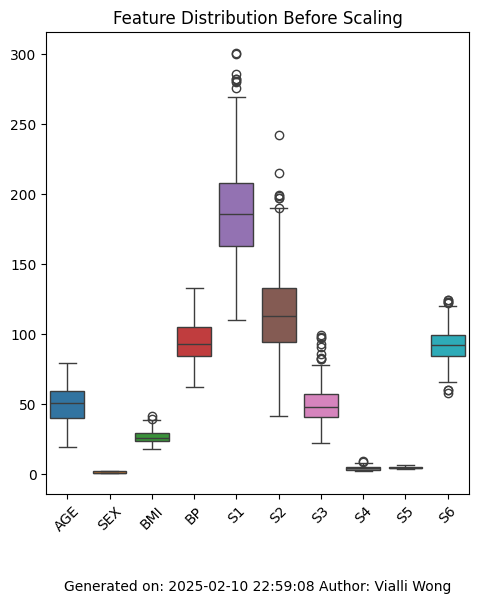

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Check data distribution before scaling
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.boxplot(data=X_train)
plt.title('Feature Distribution Before Scaling')
plt.xticks(rotation=45)
plt.text(0.5, -0.2, f'Generated on: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")} Author: Vialli Wong', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


In [60]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Text(0.5, -0.2, 'Generated on: 2025-02-10 22:59:08 Author: Vialli Wong')

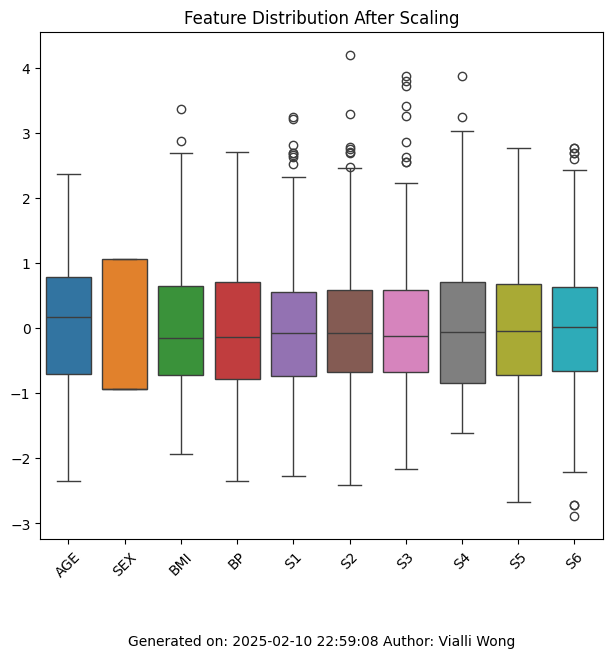

In [61]:
# Check data distribution after scaling
plt.figure(figsize=(12, 6))
plt.subplot(122)
sns.boxplot(data=X_train_scaled)
plt.title('Feature Distribution After Scaling')
plt.xticks(rotation=45)
plt.tight_layout()
plt.text(0.5, -0.2, f'Generated on: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")} Author: Vialli Wong', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


## 4. Model Development

We used sklearn's LinearRegression to create our multiple linear regression model. The model learns:

1. Coefficients (weights) for each feature

2. An intercept term

In [62]:
# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [63]:
# Model coefficients and intercept
#print("Intercept:", model.intercept_)
#print("Coefficients:", model.coef_)

# Print model coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nModel Coefficients:")
print(coefficients)
print(f"\nIntercept: {model.intercept_:.2f}")


Model Coefficients:
  Feature  Coefficient
8      S5    35.161195
2     BMI    25.607121
5      S2    24.640954
3      BP    16.828872
7      S4    13.138784
6      S3     7.676978
9      S6     2.351364
0     AGE     1.753758
1     SEX   -11.511809
4      S1   -44.448856

Intercept: 153.74


In [64]:
# Generate predictions
Y_pred = model.predict(X_test_scaled)

In [65]:
# Calculate R-squared
r_squared = r2_score(Y_test, Y_pred)
print("R-squared:", r_squared)

R-squared: 0.45260276297191915


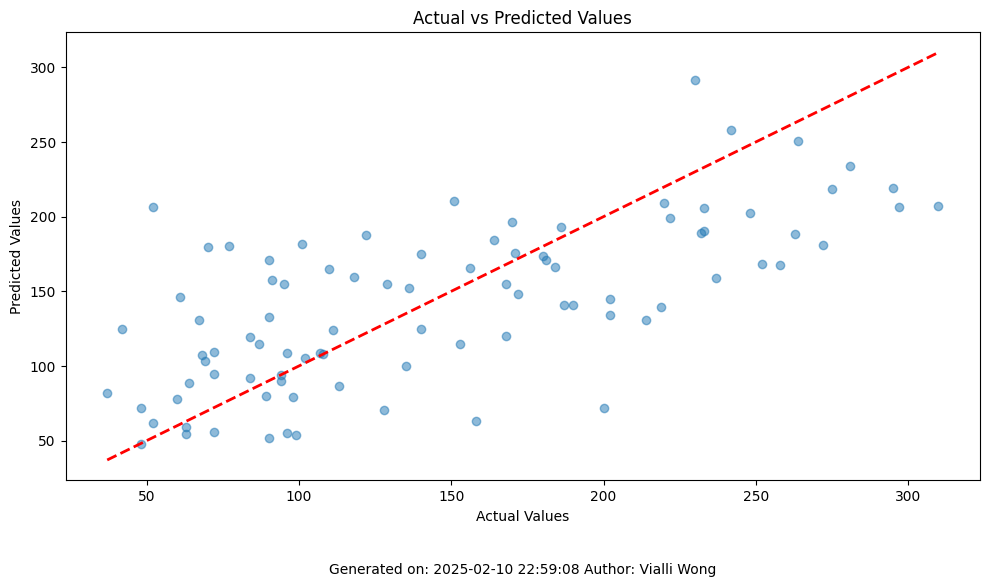

In [66]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.text(0.5, -0.2, f'Generated on: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")} Author: Vialli Wong', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

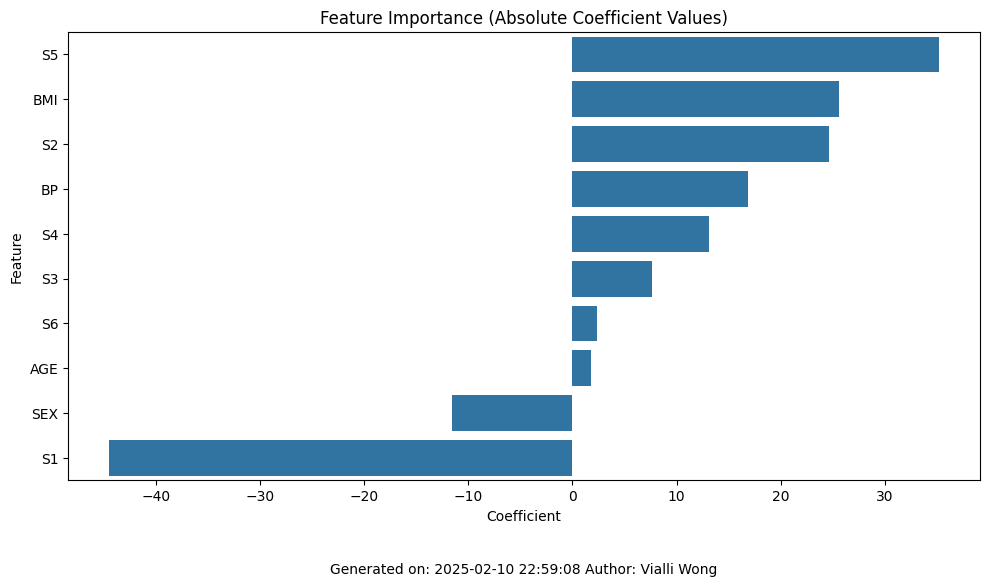

In [67]:
# Feature importance visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.text(0.5, -0.2, f'Generated on: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")} Author: Vialli Wong', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

## 5. Results Analysis

## 5.1 Model Coefficients

The coefficients show how much each feature contributes to the prediction. Positive coefficients indicate a positive correlation with the target variable, while negative coefficients indicate an inverse relationship.

## 5.2 Model Performance

The R-squared score on the test set tells us how well our model generalizes to new data. A score closer to 1.0 indicates better performance.

An R-squared value of 0.452 indicates that our model explains approximately 45.2% of the variance in the disease progression. This suggests that our model has some predictive power, but there is still room for improvement.

## 5.3 Visualizations

1. The actual vs. predicted values plot helps us visualize:

- How well our predictions align with actual values
- Any systematic bias in our predictions
- The spread of our predictions

2. The feature importance plot shows:

- Which features have the strongest impact on predictions
- The relative importance of each feature

## 6. Conclusions

This analysis demonstrates the power of linear regression for predicting continuous outcomes. The model's performance can be further improved by:

- Feature selection: Removing less important features

- Feature engineering: Creating new features from existing ones

- Using more advanced regression techniques like Ridge or Lasso regression